First few rows of the dataset:
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2               

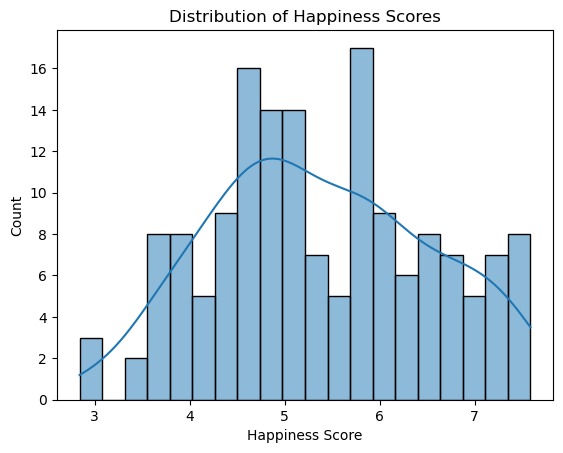

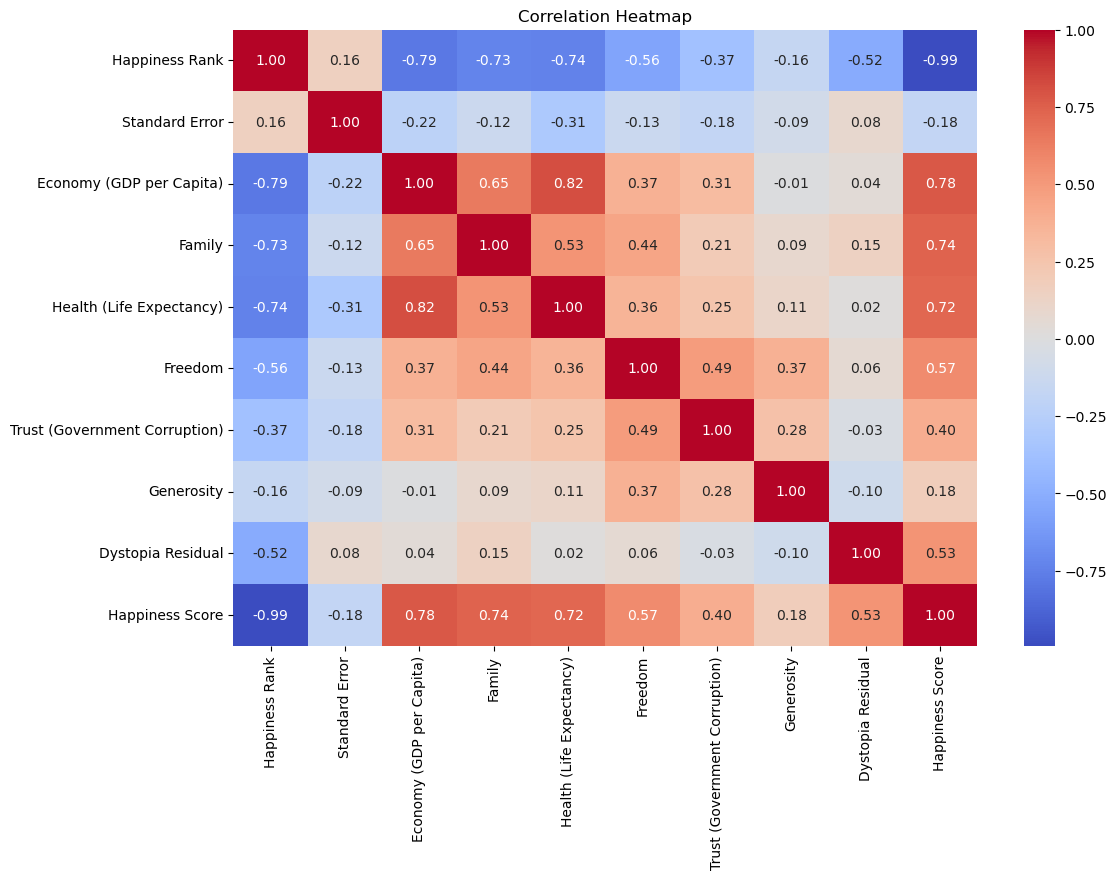


Linear Regression Model Evaluation:
Mean Squared Error: 7.427424037312655e-08
Mean Absolute Error: 0.00023374650842898637
R^2 Score: 0.9999999476481373
Root Mean Squared Error: 0.0002725330078598307

Best Parameters and Score for Decision Tree Regressor:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: -0.012607375867198681

Model Comparison Results:

Random Forest Results:
Mean Squared Error: 0.002390705487500076
Mean Absolute Error: 0.02975125000000041
R^2 Score: 0.9983149220391303
Root Mean Squared Error: 0.04889484111335342

SVM Results:
Mean Squared Error: 0.061697925368264954
Mean Absolute Error: 0.14413429330851096
R^2 Score: 0.9565124960757241
Root Mean Squared Error: 0.24839067085594208

Linear Regression Results:
Mean Squared Error: 7.427424037312655e-08
Mean Absolute Error: 0.00023374650842898637
R^2 Score: 0.9999999476481373
Root Mean Squared Error: 0.0002725330078598307

Final Model (Random Forest Regressor) Evaluation:
Mean 

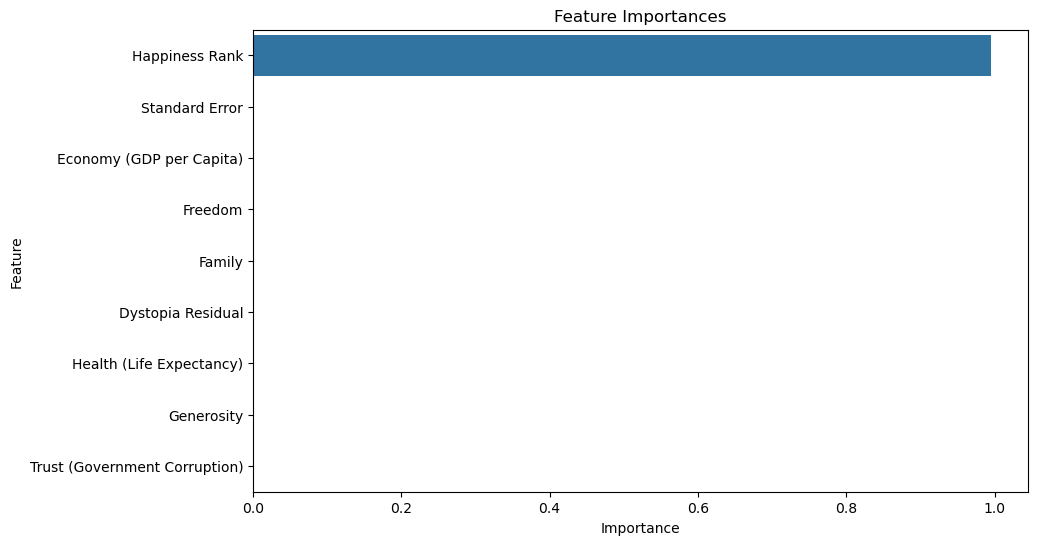

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv'
happiness_data = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(happiness_data.head())

# Display dataset information
print("\nDataset Information:")
print(happiness_data.info())

# Display basic statistics
print("\nBasic Statistics:")
print(happiness_data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(happiness_data.isnull().sum())

# Feature engineering (if needed)
# Standardize the features
features = happiness_data.drop(['Country', 'Happiness Score', 'Region'], axis=1)  # Remove 'Region' and 'Country'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame for convenience
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
happiness_score = happiness_data['Happiness Score']

# Exploratory Data Analysis (EDA)
data = features_scaled_df.copy()
data['Happiness Score'] = happiness_score

# Visualize the distribution of happiness scores
sns.histplot(data['Happiness Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.show()

# Calculate the correlation matrix using only numeric columns
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, happiness_score, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nLinear Regression Model Evaluation:")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

# Hyperparameter tuning for Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("\nBest Parameters and Score for Decision Tree Regressor:")
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

# Model comparison
rf_regressor = RandomForestRegressor(random_state=42)
svm_regressor = SVR()
lr_regressor = LinearRegression()

regressors = {
    'Random Forest': rf_regressor,
    'SVM': svm_regressor,
    'Linear Regression': lr_regressor
}

print("\nModel Comparison Results:")
for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f'\n{name} Results:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    print(f'Root Mean Squared Error: {rmse}')

# Final Model and Interpretation
final_model = RandomForestRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nFinal Model (Random Forest Regressor) Evaluation:")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

# Feature importance analysis
feature_importances = final_model.feature_importances_
features = features_scaled_df.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances')
plt.show()